In [117]:
from pathlib import Path
import matplotlib.pyplot as plt
from sdi_variation import cluster_matching as cm
import pandas as pd

In [118]:
path = "methods/MISC3"
files = list(Path(path).glob("*.csv"))
files

[PosixPath('methods/MISC3/MISC3_151674_deepst_vs_MISC3_151674_MISC3spagcn.csv'),
 PosixPath('methods/MISC3/MISC3_151674_deepst_vs_MISC3_151674_MISC3_clgraph.csv'),
 PosixPath('methods/MISC3/MISC3_151674_MISC3_clgraph_vs_MISC3_151674_MISC3spagcn.csv')]

In [119]:
def dice_stats_df(files):
    for file in files:
        scores = pd.read_csv(file)
        avg = scores['scores'].mean()
        std = scores['scores'].std()
        yield file.stem, avg, std

data = list(dice_stats_df(files))
stats_df = pd.DataFrame(
    data=data,
    columns=['filename','avg score','score std']
).set_index('filename')
stats_df.head()

,avg score,score std
filename,,
MISC3_151674_deepst_vs_MISC3_151674_MISC3spagcn,0.560882,0.324531
MISC3_151674_deepst_vs_MISC3_151674_MISC3_clgraph,0.645411,0.378891
MISC3_151674_MISC3_clgraph_vs_MISC3_151674_MISC3spagcn,0.603346,0.347763


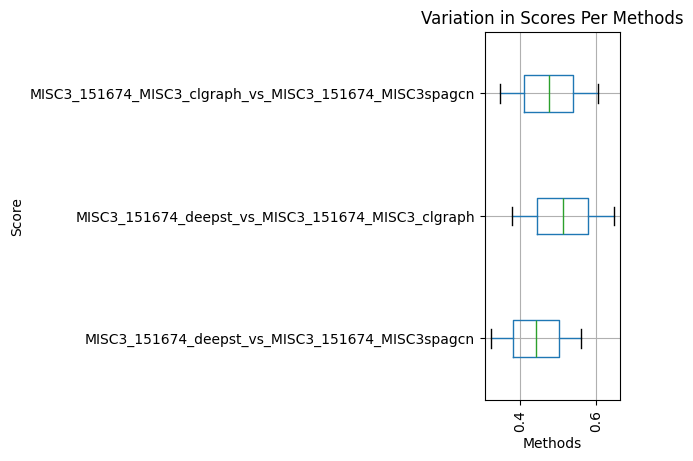

In [120]:
# plt.figure(figsize=(6, 20))  # Wider figure to fit labels

stats_df.transpose().boxplot(vert=False)
plt.xticks(rotation=90)      # Rotate labels to avoid overlap
plt.title("Variation in Scores Per Methods")
plt.xlabel("Methods")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [121]:
method = files

In [122]:
merge = pd.read_csv("output/MISC2/MISC2_151675_analysis__clustering_graphclust_clusters_vs_MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters.csv")
merge.head()

,Unnamed: 0,scores,map1,map2
0,0,1.000000,[0],[0]
1,1,0.705722,[1],[3]
2,2,0.692140,[2],[5]
3,3,0.916836,[3],[4]
4,4,0.000000,[4],"(9, np.uint8(8))"


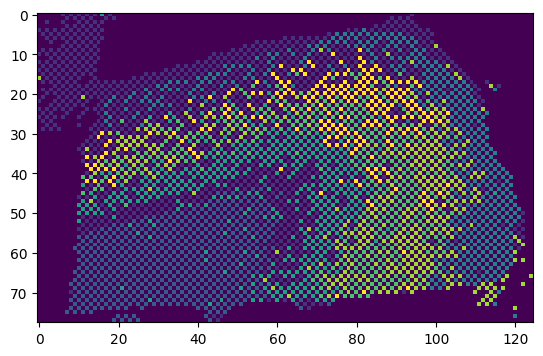

In [123]:

im1 = plt.imread("output/MISC2/MISC2_151675_analysis__clustering_graphclust_clusters.csv_.tif")[:,:,0]
plt.imshow(im1*20)

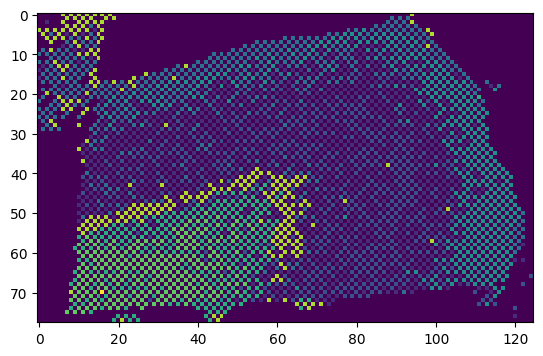

In [124]:
im2 = plt.imread("output/MISC2/MISC2_151675_analysis__clustering_kmeans_8_clusters_clusters.csv_.tif")[:,:,0]
plt.imshow(im2*20)

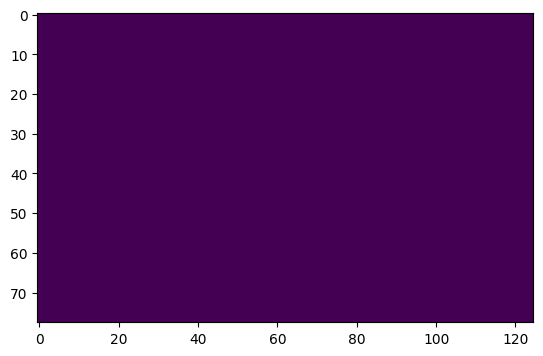

In [125]:
import numpy as np
merged = (
        np.logical_or(im2 == 9 , im2 == 9)
    ).astype(np.uint8)
plt.imshow(
    merged
)


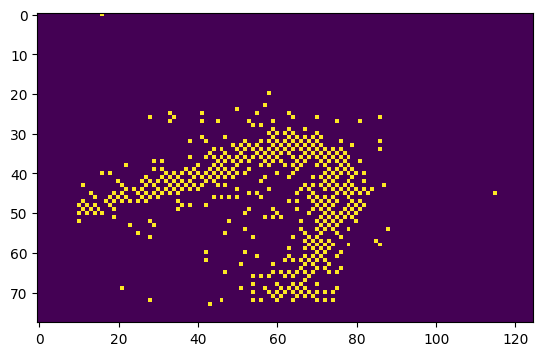

In [126]:
plt.imshow(im1 == 4)

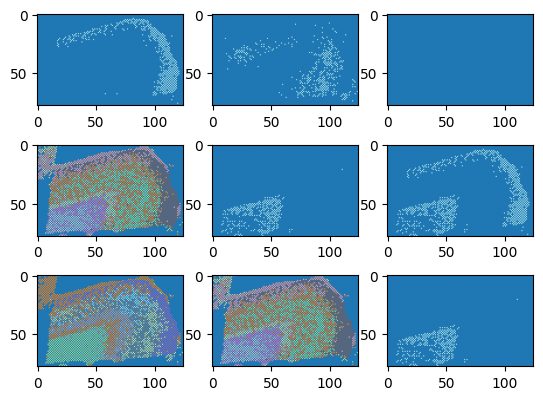

In [127]:
plt.subplot(3,3,1)
plt.imshow((im1 == 3),cmap='tab20')
plt.subplot(3,3,2)
plt.imshow((im1 == 6),cmap='tab20')
plt.subplot(3,3,3)
plt.imshow(merged,cmap='tab20')
plt.subplot(3,3,4)
plt.imshow(im2,cmap='tab20')
plt.subplot(3,3,4)
plt.imshow(im2,cmap='tab20')
plt.subplot(3,3,5)
plt.imshow((im2 == 5),cmap='tab20')
plt.subplot(3,3,6)
plt.imshow((im1 == 3).astype(np.uint8) + (im2 == 5),cmap='tab20')
plt.subplot(3,3,7)
plt.imshow(im1,cmap='tab20')
plt.subplot(3,3,8)
plt.imshow(im2,cmap='tab20')
plt.subplot(3,3,9)
plt.imshow(merged + (im2 == 5),cmap='tab20')